In [1]:
import tensorflow as tf

In [2]:
import numpy as np
from PIL import Image

size = [128, 128]

ai_arr = []
for i in range(1, 51):
    img = Image.open('Processed/Ai/' + str(i) + '.jpg')
    temp_ai_arr = tf.image.resize(img, size).numpy()
    ai_arr.append(temp_ai_arr)
    
real_arr = []
for i in range(1, 70):
    img = Image.open('Processed/Real/' + str(i) + '.jpg')
    img = np.array(img)[(2240-2048)//2: (2240+2048)//2, (3984-2048)//2: (3984+2048)//2]
    temp_real_arr = tf.image.resize(img, size).numpy()
    real_arr.append(temp_real_arr)

In [3]:
#Make the range of data from [0, 255] -> [-1, 1]
processed_real_arr = np.array(real_arr) / 255 * 2 - 1
processed_ai_arr = np.array(ai_arr) / 255 * 2 - 1

#Spliting Test and Train

x_train = np.concatenate([processed_ai_arr[0:40], processed_real_arr[0:40]])
y_train = np.array([0 for _ in range(40)] + [1 for _ in range(40)])

x_test = np.concatenate([processed_ai_arr[40:50], processed_real_arr[40:50]])
y_test = np.array([0 for _ in range(10)] + [1 for _ in range(10)])

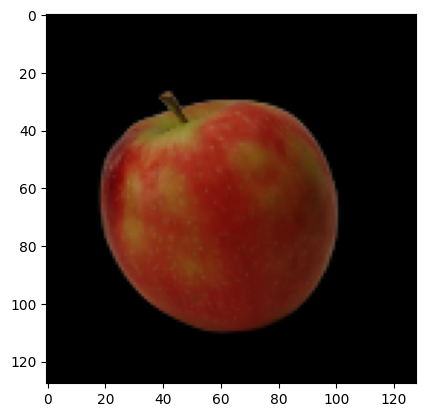

In [4]:
import matplotlib.pyplot as plt
plt.imshow(processed_real_arr[0] / 2 + 0.5)

In [5]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(*size, 3)),
  tf.keras.layers.Dense(128, activation='leaky_relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(2)
])

loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])

In [6]:
model.fit(x_train, y_train, epochs = 20, verbose = 2)
model.evaluate(x_test,  y_test, verbose = 2)

Epoch 1/20


3/3 - 1s - loss: 97.2589 - accuracy: 0.5375 - 923ms/epoch - 308ms/step
Epoch 2/20
3/3 - 0s - loss: 37.6178 - accuracy: 0.5250 - 143ms/epoch - 48ms/step
Epoch 3/20
3/3 - 0s - loss: 20.7367 - accuracy: 0.5375 - 153ms/epoch - 51ms/step
Epoch 4/20
3/3 - 0s - loss: 7.1133 - accuracy: 0.7000 - 158ms/epoch - 53ms/step
Epoch 5/20
3/3 - 0s - loss: 10.7977 - accuracy: 0.6500 - 147ms/epoch - 49ms/step
Epoch 6/20
3/3 - 0s - loss: 4.9865 - accuracy: 0.7875 - 145ms/epoch - 48ms/step
Epoch 7/20
3/3 - 0s - loss: 7.7810 - accuracy: 0.6875 - 142ms/epoch - 47ms/step
Epoch 8/20
3/3 - 0s - loss: 1.7021 - accuracy: 0.8750 - 159ms/epoch - 53ms/step
Epoch 9/20
3/3 - 0s - loss: 6.3433 - accuracy: 0.8250 - 164ms/epoch - 55ms/step
Epoch 10/20
3/3 - 0s - loss: 1.9911 - accuracy: 0.9125 - 152ms/epoch - 51ms/step
Epoch 11/20
3/3 - 0s - loss: 1.4880 - accuracy: 0.9125 - 153ms/epoch - 51ms/step
Epoch 12/20
3/3 - 0s - loss: 1.0192 - accuracy: 0.9125 - 152ms/epoch - 51ms/step
Epoch 13/20
3/3 - 0s - loss: 1

[2.731487274169922, 0.949999988079071]

0 [0.9294593334197998, 0.0] 0.7744949460029602
1 [3.1278107166290283, 0.5] 0.005640705581754446
2 [9.244996070861816, 0.5] 4.704234925156925e-06
3 [8.639972686767578, 0.5] 8.114212687360123e-05
4 [5.012842655181885, 0.5] 0.013067481108009815
5 [7.3088250160217285, 0.5] 1.640037178993225
6 [20.542652130126953, 0.5] 8.749025344848633
7 [12.111679077148438, 0.5] 38.32577896118164
8 [2.103691816329956, 0.5] 15.565101623535156
9 [8.289907455444336, 0.5] 5.119011878967285
10 [4.905159950256348, 0.5] 25.13971710205078
11 [3.3863131999969482, 0.5] 0.0
12 [48.43218994140625, 0.5] 0.0002522889990359545
13 [1.2619383335113525, 0.5] 56.83285140991211
14 [0.08609678596258163, 1.0] 32.73330307006836
15 [5.543673515319824, 0.5] 35.0894775390625
16 [15.54868221282959, 0.5] 1.0262547791356534e-17
17 [23.02638053894043, 0.5] 0.7401645183563232
18 [0.7586652040481567, 0.5] 24.66230583190918


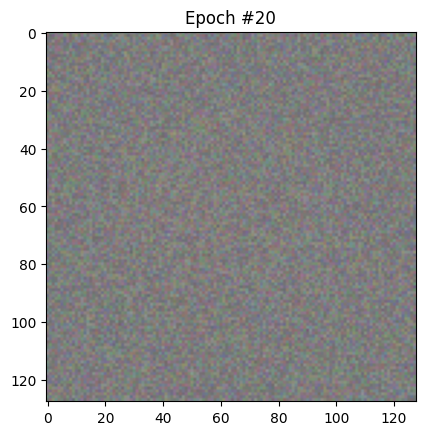

19 [2.3423502445220947, 0.5] 2.506853068094838e-17
20 [36.745872497558594, 0.5] 11.714838027954102
21 [2.015587568283081, 0.5] 0.788901150226593
22 [0.12712477147579193, 1.0] 6.894271373748779
23 [4.054141998291016, 0.5] 790.7700805664062
24 [0.08838914334774017, 1.0] 44.58262252807617
25 [40.31986999511719, 0.5] 353.5558166503906
26 [228.69984436035156, 0.5] 7.713690564134556e-20
27 [9.90043830871582, 0.5] 250.665283203125
28 [10.381093978881836, 0.5] 51.99696731567383
29 [30.281009674072266, 0.5] 0.0
30 [100.42212677001953, 0.5] 28.082571029663086
31 [1.804431576601928e-06, 1.0] 12.532604217529297
32 [4.172712802886963, 0.5] 258.8104553222656
33 [13.288972854614258, 0.5] 0.0
34 [102.74479675292969, 0.5] 16.396997451782227
35 [17.7613525390625, 0.5] 33.30247497558594
36 [3.2958579063415527, 0.5] 34.64493942260742
37 [256.4539794921875, 0.5] 1316.9620361328125
38 [19.459081649780273, 0.5] 368.36676025390625


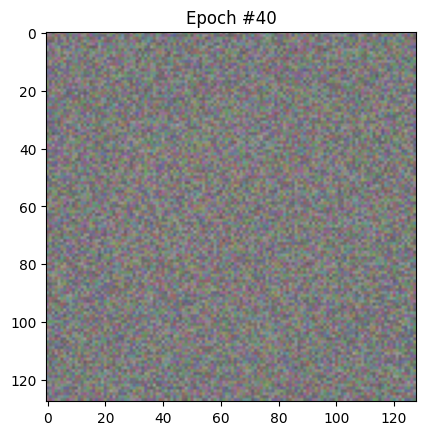

39 [719.3169555664062, 0.5] 286.982666015625
40 [205.50003051757812, 0.5] 316.4769592285156
41 [148.05052185058594, 0.5] 0.0
42 [188.9604949951172, 0.5] 95.10884857177734
43 [295.4496154785156, 0.5] 5681.08984375
44 [600.639404296875, 0.5] 571.1819458007812
45 [429.4003601074219, 0.5] 0.0
46 [909.9612426757812, 0.5] 1198.48095703125
47 [159.1020050048828, 0.5] 0.0
48 [26.018707275390625, 0.5] 20.179283142089844
49 [5.048688134223767e-10, 1.0] 20.713571548461914
50 [4.099147190572694e-06, 1.0] 11.713461875915527
51 [62.32407760620117, 0.5] 734.6967163085938
52 [0.0, 1.0] 1015.2665405273438
53 [0.0, 1.0] 211.40480041503906
54 [0.0, 1.0] 173.70643615722656
55 [181.12303161621094, 0.5] 2310.8974609375
56 [1125.7938232421875, 0.5] 32.45327377319336
57 [514.8158569335938, 0.5] 0.0
58 [74.23025512695312, 0.5] 259.4713439941406


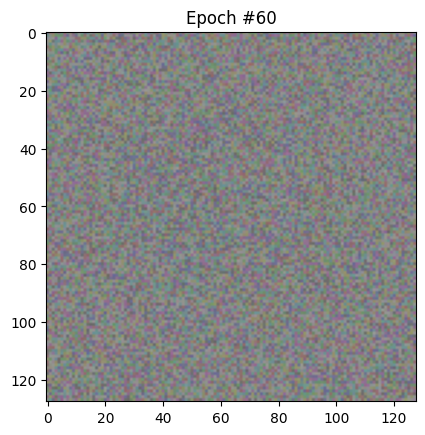

59 [0.0, 1.0] 578.4569702148438
60 [1281.71533203125, 0.5] 1304.217529296875
61 [207.19419860839844, 0.5] 289.0939025878906
62 [24.116525650024414, 0.5] 51.70203399658203
63 [5.00255012512207, 0.5] 144.34571838378906
64 [2.913773455179849e-30, 1.0] 67.31494903564453
65 [93.2518539428711, 0.5] 608.922607421875
66 [175.92630004882812, 0.5] 82.68366241455078
67 [687.7613525390625, 0.5] 11835.3310546875
68 [666.1267700195312, 0.5] 0.0
69 [0.0, 1.0] 299.2168884277344
70 [3149.103515625, 0.5] 3016.322998046875
71 [8250.1044921875, 0.5] 0.0
72 [5332.75830078125, 0.5] 15321.8154296875
73 [12891.7509765625, 0.5] 11508.8330078125
74 [92732.0625, 0.0] 0.0
75 [5005283.5, 0.0] 0.0
76 [0.0, 1.0] 3686947072.0
77 [5222879744.0, 0.5] 3866236949626880.0
78 [5901083738112000.0, 0.5] 0.0


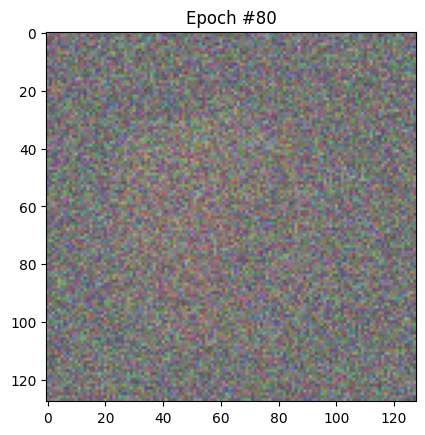

79 [7.771285664079085e+27, 0.5] inf
80 [nan, 0.5] nan
81 [nan, 0.5] nan
82 [nan, 0.5] nan
83 [nan, 0.5] nan
84 [nan, 0.5] nan
85 [nan, 0.5] nan
86 [nan, 0.5] nan
87 [nan, 0.5] nan
88 [nan, 0.5] nan
89 [nan, 0.5] nan
90 [nan, 0.5] nan
91 [nan, 0.5] nan
92 [nan, 0.5] nan
93 [nan, 0.5] nan
94 [nan, 0.5] nan
95 [nan, 0.5] nan
96 [nan, 0.5] nan
97 [nan, 0.5] nan
98 [nan, 0.5] nan


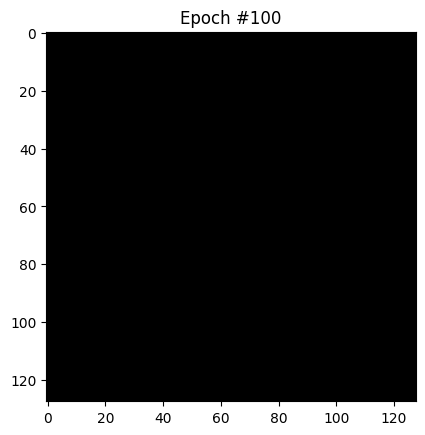

99 [nan, 0.5] nan
100 [nan, 0.5] nan
101 [nan, 0.5] nan


KeyboardInterrupt: 

In [22]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU
from keras.layers import Dropout
import matplotlib.pyplot as plt

batch_size = 1
epochs = 1000
frequency = 20
input_dimension = size[0]
output_dimension = size[0] * size[1] * 3

#Generator
generator = Sequential()
generator.add(Dense(128, input_dim = input_dimension))
generator.add(LeakyReLU())
generator.add(Dense(256))
generator.add(LeakyReLU())
generator.add(Dense(512))
generator.add(LeakyReLU())
generator.add(Dense(output_dimension, activation = 'tanh'))

#Discriminator
discriminator = Sequential()
discriminator.add(Dense(512, input_dim = output_dimension))
discriminator.add(LeakyReLU())
discriminator.add(Dense(256))
discriminator.add(LeakyReLU())
# discriminator.add(Dense(2))
discriminator.add(Dense(1, activation = 'sigmoid'))

# Compile the models
generator.compile(loss='binary_crossentropy')
discriminator.compile(loss='binary_crossentropy',
    optimizer='sgd',
    metrics=['accuracy'])

# Define the GAN model
gan = Sequential()
gan.add(generator)
gan.add(discriminator)
gan.compile(loss='binary_crossentropy', optimizer='adam')

data = processed_real_arr.reshape([69, -1])

for epoch in range(epochs):
    # Generate fake data
    noise = np.random.normal(size=(batch_size, input_dimension))
    generated_image = np.array(generator.predict(noise, verbose=0))

    if epoch % frequency == frequency - 1:
        plt.imshow(generated_image[0].reshape([*size, 3]) * 0.5 + 0.5)
        plt.title("Epoch #" + str(epoch + 1))
        plt.show()

    # X = np.concatenate([generated_image, x_train.reshape([80, -1])])
    # Y = np.concatenate([np.zeros(batch_size), y_train])

    random_index = np.random.choice(list(range(69)), size=batch_size, replace=False)
    random_data = np.concatenate([data[i] for i in random_index]).reshape([batch_size, -1])

    X = np.concatenate([generated_image, random_data])
    Y = np.concatenate([np.zeros(batch_size), np.ones(batch_size)])

    discriminator.trainable = True
    loss_d = discriminator.train_on_batch(X, Y)
    # loss_d_1 = discriminator.train_on_batch(random_data, np.ones(batch_size))
    # loss_d_1 = discriminator.train_on_batch(data, np.ones(69))
    # loss_d_2 = discriminator.train_on_batch(generated_image, np.zeros(batch_size))

    Y_gen = np.ones(batch_size)
    discriminator.trainable = False
    loss_g = gan.train_on_batch(noise, Y_gen)

    print(epoch, loss_d, loss_g)